In [3]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 

# Bepaling van soortelijke warmte van water


# Introductie

Water heeft een enorme buffercapaciteit: je moet veel energie toevoegen om de temperatuur van water een graad te verwarmen. In dit practicum gaan we de soortelijke warmte van water bepalen door een bekende hoeveelheid water te verwarmen met een bekende hoeveelheid energie, en de temperatuurstijging te meten.

# Theorie

De soortelijke warmte wordt gegeven door:
$$
    c = \frac{Q}{m \Delta T}
$$ (eq:heat_capacity)

Door het toevoegen van een bepaalde energie $Q$ en bekende massa van het water en daarbij het temperatuurverschil $dT$ te meten kunnen we $c$ bepalen. Voor het maken van een goede fit kijken we naar het temperatuurverschil na verschillende waardes van toegevoegde energie $Q$. Deze wordt gegeven door:

$$
    Q=P\cdot t
$$

Door met een contstant vermogen energie toe te voegen is er voor elke dt een andere hoeveelheid toegevoerde energie. Deze energie komt in deze proef uit een elektrisch verwarmingselement. Elektrisch vermogen wordt gegeven door:

$$
    P=I\cdot U
$$

# Methode en materialen

## Ontwerp
Een waterbad met bekende massa aan water wordt verwarmd met een elektrisch verwarmingselement dat een bekende hoeveelheid energie levert.
De temperatuur van het water wordt gemeten met een temperatuursensor.
Door de temperatuurstijging als functie van de tijd te meten kan de soortelijke warmte van water worden berekend.


## Materialen
Hieronder staat de lijst van benodigde materialen bij deze proef:
- Maatbeker
- Weegschaal
- Water
- Elektrisch verwarmingselement ($10 \mathrm{\Omega}$, $10 \mathrm{W}$)
- Voedingsbron 
- Thermometer of temperatuursensor
- Stopwatch of timer

```{figure} figures/cwater_setup.jpg
:width: 70%

Een schematische weergave van de opstelling
```

## Procedure
```{exercise}
1. Beschrijf de procedure die nodig is om de soortelijke warmte van water te bepalen.
2. Geef jouw beschrijving van de procedure aan een ander team, zij verzamelen voor jou de data op basis van de gegevens.
3. Voer het experiment van een ander team uit op basis van hun beschrijving.
4. Analyseer de data die het andere groepje voor jou heeft verzameld.
```
- Weeg de maatbeker
- Weeg de maatbeker en vul deze vervolgens met 400mL water 
- Bepaal de massa van het water door de massa van de maatbeker met het water min de massa van de maatbeker te doen
- Stop vervolgens de thermometer in het water en meet de temperatuur
- Sluit daarna het elektrisch verwarmingelement aan met de powersupply en stop het verwarmingselement in het water. Zet de powersupply vervolgens aan op 18.7 V en 1.9 A (geeft een totaal van 35.53W). Start op hetzelfde moment de stopwatch
- Meet gedurende 5 minuten om de 20 seconden met de thermometer de temperatuur van het water en noteer de temperaturen na ieder tijdsinterval
- Zet het verwarmingelement uit en haal deze uit het water


## Veiligheid
We maken gebruik van een $10 \mathrm{\Omega}$, $10 \mathrm{W}$ weerstand.
Deze wordt snel heet.
De bronspanning mag dan ook alleen aan wanneer de weerstand in het water zit.
Raak de weerstand niet aan tijdens het experiment.
Omdat de weerstand in het water zit, kunnen we wel het elektrisch vermogen hoger zetten zonder dat de weerstand oververhit raakt.
Het maximaal vermogen mag $40 \mathrm{W}$ zijn.
Daarbij moet de roerder wel aanstaan om de warmte goed te verdelen.

## Data analyse
Geef kort de data-analysemethode weer.

# Resultaten


In [29]:
#vaste data
m_maatbeker_leeg = 195.7e-3 #kg
m_maatbeker_vol = 693.3e-3  #kg
m_water=m_maatbeker_vol-m_maatbeker_leeg
P=31.14 #U=17.3 V I=1.8A

#gemeten data
Temp = np.array([21.8,22.0,22.3,22.6,22.9,23.0,23.3,23.6,23.8,24.2,24.6,24.7,24.9,25.2,25.4,25.8,26.2,26.3]) #C
Tijd = np.array([20,40,60,80,90,100,120,140,160,180,200,220,240,260,280,300,320,340]) #s

#dT berekenen
dT=Temp-21.4 #C

De soortelijke warmte van water is 4208.7451450594635 +/- [37.03316364] J/kg


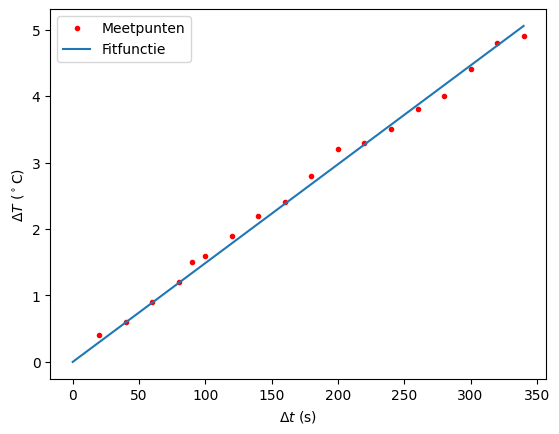

In [ ]:
#Functie dT=(t*P)/(c*m)
def deltaT(t,c):
    return (t*P)/(c*m_water)

values, pcov= curve_fit(deltaT,Tijd, dT)


c_w=values[0] #J/Kg #soortelijkewarmte
u_c_w=np.sqrt(pcov[0]) #J/Kg #onzekerheid c
print('De soortelijke warmte van water is', c_w, '+/-', u_c_w, 'J/kg')

#fitwaardes maken
x_fit=np.linspace(0,max(Tijd), 1000)
y_fit=deltaT(x_fit,c_w)

#plotten
plt.figure()
plt.plot(Tijd, dT, 'r.',label='Meetpunten')
plt.plot(x_fit,y_fit, label='Fitfunctie')
plt.ylabel('$\\Delta T$ ($^\\circ$C)')
plt.xlabel('$\\Delta t$ (s)')
plt.legend()
plt.savefig(r'C:\TUDelftProgrameren\thermolab\Figures\plot_cwater.png', dpi=450) #saven figuur als cwater
plt.show()


# Discussie en conclusie

Hier een korte discussie en conclusie over de resultaten van het experiment en de implicaties daarvan.